 <div style="text-align: center;"><h1>Therapy Dogs for Hospital Patients</h1>
    <h2> Annelise McKay</h2>
    <h3>Thursday, September 07, 2023 </h3> </div>

<div style="text-align: center;"> <h1> Research Question:</h1>
<h3> Are therapy dogs more effective at alleviating depression, anxiety, and physical pain in emergency department hospital patients compared to standard healthcare treatments? </h3> </div>

 <div style="text-align: center;"><h1>Content:  </h1></div>
         <ul>
    <li><b>Introduction:</b> Summary of the experiment behind the data in this analysis</li>
    <li><b>Methods:</b> What I expected to find and how I attempted to find it. </li>
    <li><b>Results:</b> Visualizations and key findings. </i>
    <li><b>Discussion:</b> Implications of the key findings.
    <li><b>Conclusion:</b> Takeaways from this experiment.</li>
    </ul>

<div style="display: flex;">
    <img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/DogImage.png?raw=true" alt="Image Alt Text" width="300">
    <div style="flex: 1; margin-left: 20px; font-size: 16pt;">
        <h1>Introduction:</h1>
        <br></br>
            <li>Objective: Test relationship between therapy dogs and depression/anxiety/pain levels</li>
                <li>Participants: 80 medically stable emergency department patients over the age of 18</li>
                <li>Groups: Participants divided into two groups- dog vs. control</li>
                <li>Measurement: Levels of depression, anxiety, and pain were rated on a scale from 0-10</li>
        <p><strong>Data Source:</strong> Kline, Jeffrey A. (2019). Data from: Controlled clinical trial of canine therapy versus usual care to reduce patient anxiety in the emergency department [Dataset]. Dryad. <a href="https://doi.org/10.5061/dryad.9pv5625">https://doi.org/10.5061/dryad.9pv5625</a></p></font>
    </div>
</div>


In [184]:
#importing all packages I might use
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [185]:
#loading the data
excel_file_path = '/Users/annelisemckay/Downloads/CANINE_DATA_LABELS_2018-12-07 public deidentified V3.xls'
df = pd.read_excel(excel_file_path)

In [186]:
#first look at the dataset
df.head()

,Record ID,Event Name,Age,Gender,Race,Race - Other,Is subject a veteran?,Is subject disabled?,Medical History (choice=None),Medical History (choice=Asthma),...,Patient Anxiety rating based on image above,Unnamed: 82,Time Scales Administered (Provider),Provider Pain rating based on image above,Provider Depression rating based on image above,Provider Anxiety rating based on image above,Did the subject touch the dog?,Did you talk to the subject about their problem?,"On a scale of 0-5 how would you rate the subject's interaction with the dog? 0 = withdrawn, no interaction with either me or dog 3 = some interaction with me and/or dog 5 = engaged with me and dog",Complete?.2
0,1 - Withdrawn,Baseline (T0) (Arm 1: Dog),61.0,Female,White,NaN,NaN,NaN,Unchecked,Unchecked,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete
1,5,Baseline (T0) (Arm 1: Dog),41.0,Female,White,NaN,NaN,NaN,Unchecked,Checked,...,6.0,NaN,14:00:00,0.0,9.0,8.0,NaN,NaN,NaN,Complete
2,6,Baseline (T0) (Arm 1: Dog),58.0,Male,White,NaN,NaN,NaN,Unchecked,Unchecked,...,6.0,NaN,10:18:00,0.0,2.0,8.0,NaN,NaN,NaN,Complete
3,9,Baseline (T0) (Arm 1: Dog),72.0,Female,White,NaN,NaN,NaN,Unchecked,Unchecked,...,10.0,NaN,12:24:00,0.0,10.0,4.0,NaN,NaN,NaN,Complete
4,10,Baseline (T0) (Arm 1: Dog),54.0,Female,White,NaN,NaN,NaN,Unchecked,Unchecked,...,6.0,NaN,11:16:00,2.0,2.0,4.0,NaN,NaN,NaN,Complete


In [187]:
#dropping unneeded columns and dropping missing values
df_hospitaldogs = df[['Event Name', 'Patient  Depression rating based on image above', 'Patient  Anxiety rating based on image above', 'Patient  Pain rating based on image above']].dropna()

In [188]:
df_hospitaldogs

,Event Name,Patient Depression rating based on image above,Patient Anxiety rating based on image above,Patient Pain rating based on image above
0,Baseline (T0) (Arm 1: Dog),10.0,10.0,3.0
1,Baseline (T0) (Arm 1: Dog),6.0,6.0,6.0
2,Baseline (T0) (Arm 1: Dog),2.0,6.0,0.0
3,Baseline (T0) (Arm 1: Dog),8.0,10.0,2.0
4,Baseline (T0) (Arm 1: Dog),6.0,6.0,10.0
...,...,...,...,...
247,T2 (Arm 2: No Dog),4.0,6.0,8.0
248,T2 (Arm 2: No Dog),4.0,4.0,7.0
250,T2 (Arm 2: No Dog),4.0,4.0,5.0
251,T2 (Arm 2: No Dog),4.0,6.0,4.0


In [189]:
#renaming features with clearer labels
new_column_names = ['Dog vs. Control Treatment', 'Depression Rating', 'Anxiety Rating', 'Pain Rating']
df_hospitaldogs.columns = new_column_names
df_hospitaldogs

,Dog vs. Control Treatment,Depression Rating,Anxiety Rating,Pain Rating
0,Baseline (T0) (Arm 1: Dog),10.0,10.0,3.0
1,Baseline (T0) (Arm 1: Dog),6.0,6.0,6.0
2,Baseline (T0) (Arm 1: Dog),2.0,6.0,0.0
3,Baseline (T0) (Arm 1: Dog),8.0,10.0,2.0
4,Baseline (T0) (Arm 1: Dog),6.0,6.0,10.0
...,...,...,...,...
247,T2 (Arm 2: No Dog),4.0,6.0,8.0
248,T2 (Arm 2: No Dog),4.0,4.0,7.0
250,T2 (Arm 2: No Dog),4.0,4.0,5.0
251,T2 (Arm 2: No Dog),4.0,6.0,4.0


In [190]:
#creating a dictionary to rename my categorical observations with clearer labels
new_values = {'Baseline (T0) (Arm 1: Dog)': 'Initial Dog Exposure', 'T1 (Arm 1: Dog)' : '30 Minutes Post Dog Exposure', 'Baseline (T0) (Arm 2: No Dog)': 'Initial Control Exposure', 'T1 (Arm 2: No Dog)': '30 Minutes Post Control Exposure', 'T2 (Arm 1: Dog)': '60 Minutes Post Dog Exposure', 'T2 (Arm 2: No Dog)': '60 Minutes Post Control Exposure'}

In [191]:
#renaming categorical observations
df_hospitaldogs['Dog vs. Control Treatment'] = df_hospitaldogs['Dog vs. Control Treatment'].replace(new_values)
df_hospitaldogs

,Dog vs. Control Treatment,Depression Rating,Anxiety Rating,Pain Rating
0,Initial Dog Exposure,10.0,10.0,3.0
1,Initial Dog Exposure,6.0,6.0,6.0
2,Initial Dog Exposure,2.0,6.0,0.0
3,Initial Dog Exposure,8.0,10.0,2.0
4,Initial Dog Exposure,6.0,6.0,10.0
...,...,...,...,...
247,60 Minutes Post Control Exposure,4.0,6.0,8.0
248,60 Minutes Post Control Exposure,4.0,4.0,7.0
250,60 Minutes Post Control Exposure,4.0,4.0,5.0
251,60 Minutes Post Control Exposure,4.0,6.0,4.0


In [192]:
#dropping the duplicates
df_hospitaldogs = df_hospitaldogs.drop_duplicates()
df_hospitaldogs

,Dog vs. Control Treatment,Depression Rating,Anxiety Rating,Pain Rating
0,Initial Dog Exposure,10.0,10.0,3.0
1,Initial Dog Exposure,6.0,6.0,6.0
2,Initial Dog Exposure,2.0,6.0,0.0
3,Initial Dog Exposure,8.0,10.0,2.0
4,Initial Dog Exposure,6.0,6.0,10.0
...,...,...,...,...
247,60 Minutes Post Control Exposure,4.0,6.0,8.0
248,60 Minutes Post Control Exposure,4.0,4.0,7.0
250,60 Minutes Post Control Exposure,4.0,4.0,5.0
251,60 Minutes Post Control Exposure,4.0,6.0,4.0


In [193]:
#double checking that the duplicates were removed from each observation 
#this gave me insight into some liminations of the dataset
#ie: some participant data dropped off in the 30 and 60 Minutes groups
unique_groups = df_hospitaldogs['Dog vs. Control Treatment'].unique()

group_counts = {}

for group in unique_groups:
    group_rows = df_hospitaldogs[df_hospitaldogs['Dog vs. Control Treatment'] == group]
    group_counts[group] = group_rows.shape[0]

for group, count in group_counts.items():
    print(f"Number of rows in '{group}': {count}")

Number of rows in 'Initial Dog Exposure': 39
Number of rows in 'Initial Control Exposure': 39
Number of rows in '30 Minutes Post Dog Exposure': 32
Number of rows in '30 Minutes Post Control Exposure': 37
Number of rows in '60 Minutes Post Dog Exposure': 24
Number of rows in '60 Minutes Post Control Exposure': 16


In [194]:
#correlation matrix between depression, anxiety, and physical pain levels
numeric_columns = df_hospitaldogs.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                   Depression Rating  Anxiety Rating  Pain Rating
Depression Rating           1.000000        0.691394     0.184098
Anxiety Rating              0.691394        1.000000     0.208597
Pain Rating                 0.184098        0.208597     1.000000


 <div style="text-align: center;"><h1>Methods</h1></div>
 <li>Hypothesis: Those in the dog group will have, on average, lower levels of depression, anxiety, and pain than those in the control group.
 <li>Divided data into six groups (3 for Dog, 3 for Control), checked the distribution of each group, and collected the mean depression, anxiety, and pain ratings within each group.</li></h2>

In [195]:
#Collecting means of depression, anxiety, and pain ratings in patients who were exposed to canine therapy
gb = df_hospitaldogs.groupby("Dog vs. Control Treatment")
gb.get_group("Initial Dog Exposure").mean(numeric_only = True)

Depression Rating    5.205128
Anxiety Rating       6.307692
Pain Rating          6.179487
dtype: float64

In [196]:
gb.get_group("30 Minutes Post Dog Exposure").mean(numeric_only = True)

Depression Rating    3.4375
Anxiety Rating       3.8750
Pain Rating          4.3125
dtype: float64

In [197]:
gb.get_group("60 Minutes Post Dog Exposure").mean(numeric_only = True)

Depression Rating    3.416667
Anxiety Rating       4.125000
Pain Rating          4.375000
dtype: float64

In [198]:
#Putting collected means in a dictionary for graphing purposes
dep_means = {'Initial Dog Exposure': 5.2, 'Thirty Minutes Post Exposure': 3.44, 'Sixty Minutes Post Exposure': 3.41}

print(dep_means)

{'Initial Dog Exposure': 5.2, 'Thirty Minutes Post Exposure': 3.44, 'Sixty Minutes Post Exposure': 3.41}


In [199]:
anx_means = {'Initial Dog Exposure': 6.3, 'Thirty Minutes Post Exposure': 3.8, 'Sixty Minutes Post Exposure': 4.1}
print(anx_means)
anx_means.values()

{'Initial Dog Exposure': 6.3, 'Thirty Minutes Post Exposure': 3.8, 'Sixty Minutes Post Exposure': 4.1}


dict_values([6.3, 3.8, 4.1])

In [200]:
pain_means = {'Initial Dog Exposure': 6.2, 'Thirty Minutes Post Exposure': 4.3, 'Sixty Minutes Post Exposure': 4.3}

In [201]:
#Collecting means of depression, anxiety, and pain ratings in patients who were exposed to standard care
gb = df_hospitaldogs.groupby("Dog vs. Control Treatment")
gb.get_group("Initial Control Exposure").mean(numeric_only = True)

Depression Rating    4.794872
Anxiety Rating       5.948718
Pain Rating          5.948718
dtype: float64

In [202]:
gb = df_hospitaldogs.groupby("Dog vs. Control Treatment")
gb.get_group("30 Minutes Post Control Exposure").mean(numeric_only = True)

Depression Rating    4.459459
Anxiety Rating       5.378378
Pain Rating          5.081081
dtype: float64

In [203]:
gb = df_hospitaldogs.groupby("Dog vs. Control Treatment")
gb.get_group("60 Minutes Post Control Exposure").mean(numeric_only = True)

Depression Rating    4.1250
Anxiety Rating       5.5625
Pain Rating          4.8125
dtype: float64

In [204]:
#Putting collected means in dictionaries
dep_means_ctrl = {'Initial Control Exposure': 4.8, 'Thirty Minutes Post Exposure': 4.5, 'Sixty Minutes Post Exposure': 4.1}

In [205]:
anx_means_ctrl = {'Initial Control Exposure': 5.9, 'Thirty Minutes Post Exposure': 5.4, 'Sixty Minutes Post Exposure': 5.6}

In [206]:
pain_means_ctrl = {'Initial Control Exposure': 5.9, 'Thirty Minutes Post Exposure': 5.1, 'Sixty Minutes Post Exposure': 4.8}

 <div style="text-align: center;"><h1>Results</h1></div>

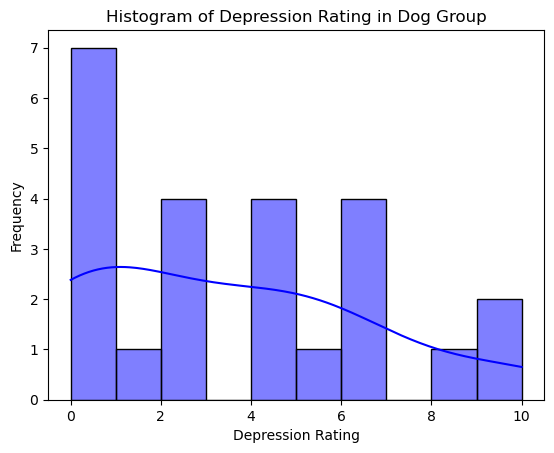

In [207]:
selected_categories = ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure']
histograms = []

for category in selected_categories:
    selected_data = df_hospitaldogs[df_hospitaldogs['Dog vs. Control Treatment'] == category]
sns.histplot(selected_data['Depression Rating'], bins=10, kde=True, color='blue', label='Histogram')
plt.title('Histogram of Depression Rating in Dog Group')
plt.xlabel('Depression Rating')
plt.ylabel('Frequency')
plt.show()

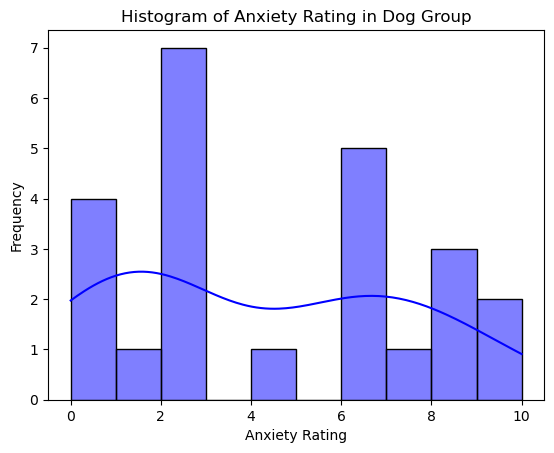

In [208]:
selected_categories = ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure']
histograms = []

for category in selected_categories:
    selected_data = df_hospitaldogs[df_hospitaldogs['Dog vs. Control Treatment'] == category]
sns.histplot(selected_data['Anxiety Rating'], bins=10, kde=True, color='blue', label='Histogram')
plt.title('Histogram of Anxiety Rating in Dog Group')
plt.xlabel('Anxiety Rating')
plt.ylabel('Frequency')
plt.show()

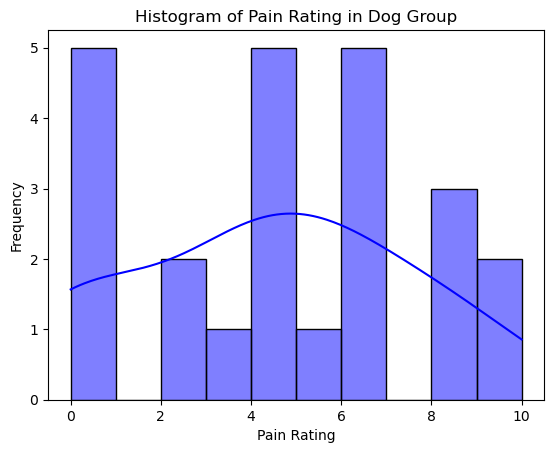

In [209]:
selected_categories = ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure']
histograms = []

for category in selected_categories:
    selected_data = df_hospitaldogs[df_hospitaldogs['Dog vs. Control Treatment'] == category]
sns.histplot(selected_data['Pain Rating'], bins=10, kde=True, color='blue', label='Histogram')
plt.title('Histogram of Pain Rating in Dog Group')
plt.xlabel('Pain Rating')
plt.ylabel('Frequency')
plt.show()

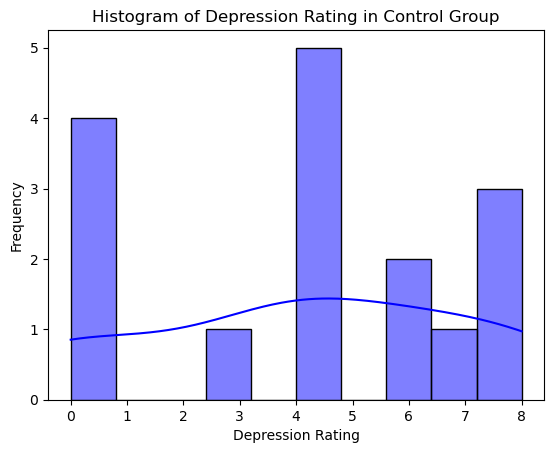

In [210]:
selected_categories = ['Initial Control Exposure', '30 Minutes Post Control Exposure', '60 Minutes Post Control Exposure']
histograms = []

for category in selected_categories:
    selected_data = df_hospitaldogs[df_hospitaldogs['Dog vs. Control Treatment'] == category]
sns.histplot(selected_data['Depression Rating'], bins=10, kde=True, color='blue', label='Histogram')
plt.title('Histogram of Depression Rating in Control Group')
plt.xlabel('Depression Rating')
plt.ylabel('Frequency')
plt.show()

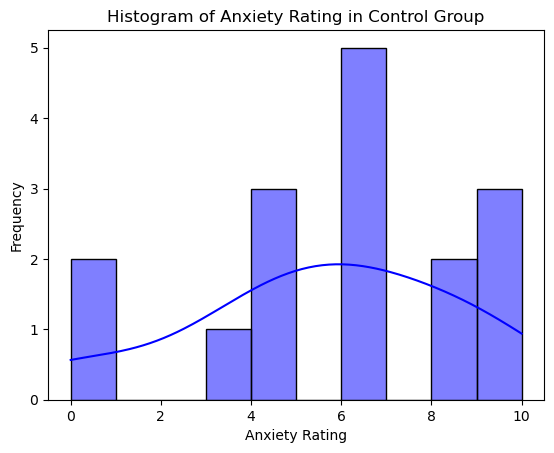

In [211]:
selected_categories = ['Initial Control Exposure', '30 Minutes Post Control Exposure', '60 Minutes Post Control Exposure']
histograms = []

for category in selected_categories:
    selected_data = df_hospitaldogs[df_hospitaldogs['Dog vs. Control Treatment'] == category]
sns.histplot(selected_data['Anxiety Rating'], bins=10, kde=True, color='blue', label='Histogram')
plt.title('Histogram of Anxiety Rating in Control Group')
plt.xlabel('Anxiety Rating')
plt.ylabel('Frequency')
plt.show()

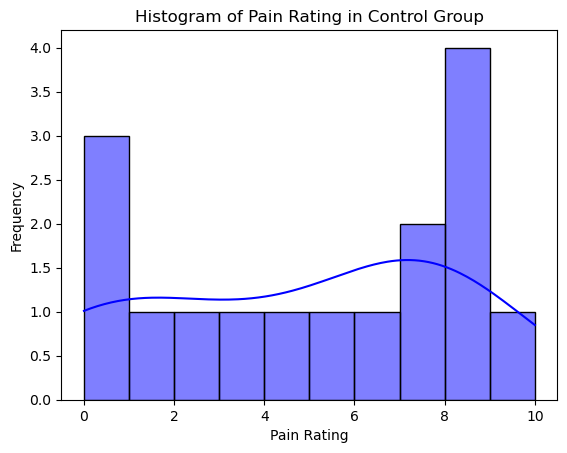

In [212]:
selected_categories = ['Initial Control Exposure', '30 Minutes Post Control Exposure', '60 Minutes Post Control Exposure']
histograms = []

for category in selected_categories:
    selected_data = df_hospitaldogs[df_hospitaldogs['Dog vs. Control Treatment'] == category]
sns.histplot(selected_data['Pain Rating'], bins=10, kde=True, color='blue', label='Histogram')
plt.title('Histogram of Pain Rating in Control Group')
plt.xlabel('Pain Rating')
plt.ylabel('Frequency')
plt.show()

<div>
    <img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/DepressionDogDist.png?raw=true" alt="Image Alt Text" width="300" style="display: inline-block;">
    <img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/AnxietyDogDist.png?raw=true" alt="Image Alt Text" width="300" style="display: inline-block;">
    <img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/PainDogDist.png?raw=true" alt="Image Alt Text" width="300" style="display: inline-block;">
</div>

<div>
    <img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/DepressionControlDist.png?raw=true" alt="Image Alt Text" width="300" style="display: inline-block;">
    <img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/AnxietyControlDist.png?raw=true" alt="Image Alt Text" width="300" style="display: inline-block;">
    <img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/PainControlDist.png?raw=true" alt="Image Alt Text" width="300" style="display: inline-block;">
</div>

![Image Alt Text](https://github.com/annelisemckay/curly-chainsaw/blob/main/AnxietyDogGraphs1.png?raw=true)

![Image Alt Text](https://github.com/annelisemckay/curly-chainsaw/blob/main/DepressionDogGraphs1.png?raw=true)

![Image Alt Text](https://github.com/annelisemckay/curly-chainsaw/blob/main/PainDogGraphs2.png?raw=true)

/var/folders/np/1rs948tn0mlclgg44kr4kqk40000gn/T/ipykernel_55925/3055919526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospitaldogs['CategoryGroup'] = ['Group1' if dog in ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure'] else 'Group2' for dog in df_hospitaldogs['Dog vs. Control Treatment']]


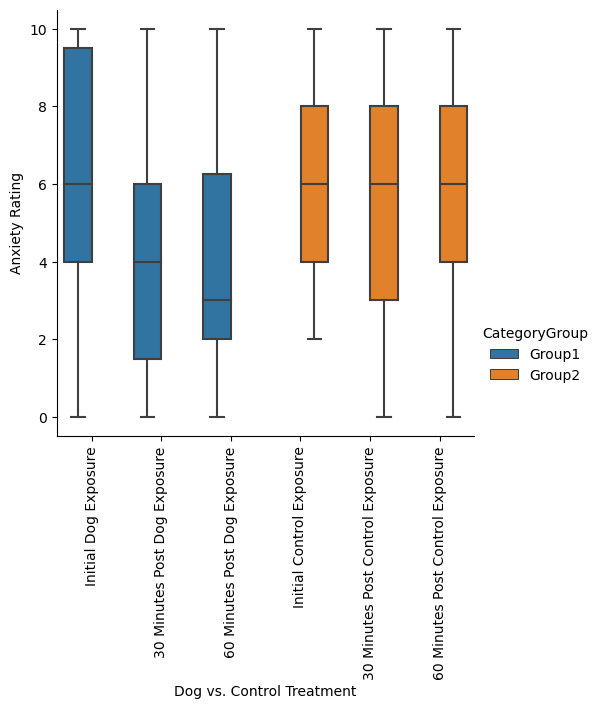

In [216]:
desired_order = ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure', 'Initial Control Exposure', '30 Minutes Post Control Exposure', '60 Minutes Post Control Exposure']
df_hospitaldogs['CategoryGroup'] = ['Group1' if dog in ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure'] else 'Group2' for dog in df_hospitaldogs['Dog vs. Control Treatment']]
sns.catplot(x = 'Dog vs. Control Treatment', 
            y = 'Anxiety Rating', 
            data = df_hospitaldogs, 
            kind = 'box',
            hue = 'CategoryGroup',
            order = desired_order)
plt.xticks(rotation=90)
plt.show()

<img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/AnxietyCatPlot1.png?raw=true" alt="Image Alt Text" style="display: block; margin: 0 auto;">


/var/folders/np/1rs948tn0mlclgg44kr4kqk40000gn/T/ipykernel_55925/691982910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospitaldogs['CategoryGroup'] = ['Group1' if dog in ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure'] else 'Group2' for dog in df_hospitaldogs['Dog vs. Control Treatment']]


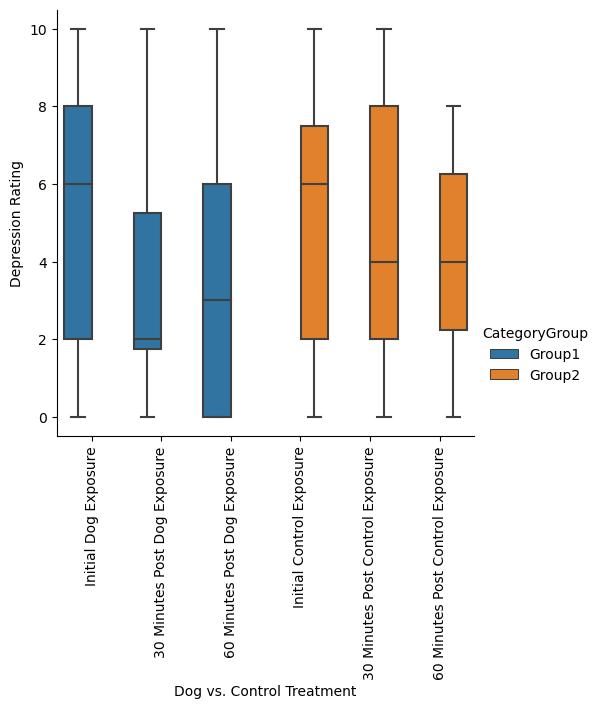

In [214]:
custom_palette = {'Group1': 'green', 'Group2': 'blue'}
df_hospitaldogs['CategoryGroup'] = ['Group1' if dog in ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure'] else 'Group2' for dog in df_hospitaldogs['Dog vs. Control Treatment']]
desired_order = ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure', 'Initial Control Exposure', '30 Minutes Post Control Exposure', '60 Minutes Post Control Exposure']
sns.catplot(x = 'Dog vs. Control Treatment', 
            y = 'Depression Rating', 
            data = df_hospitaldogs, 
            kind = 'box',
            hue = 'CategoryGroup',
            order = desired_order)
plt.xticks(rotation=90)
plt.show()

<img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/DepressionCatplot1.png?raw=true" alt="Image Alt Text" style="display: block; margin: 0 auto;">

/var/folders/np/1rs948tn0mlclgg44kr4kqk40000gn/T/ipykernel_55925/2409259219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospitaldogs['CategoryGroup'] = ['Group1' if dog in ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure'] else 'Group2' for dog in df_hospitaldogs['Dog vs. Control Treatment']]


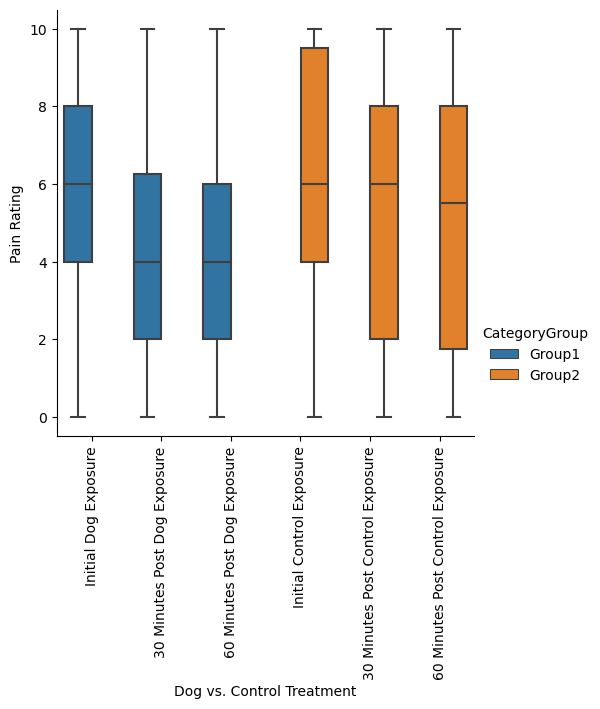

In [215]:
desired_order = ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure', 'Initial Control Exposure', '30 Minutes Post Control Exposure', '60 Minutes Post Control Exposure']
df_hospitaldogs['CategoryGroup'] = ['Group1' if dog in ['Initial Dog Exposure', '30 Minutes Post Dog Exposure', '60 Minutes Post Dog Exposure'] else 'Group2' for dog in df_hospitaldogs['Dog vs. Control Treatment']]
sns.catplot(x = 'Dog vs. Control Treatment', 
            y = 'Pain Rating', 
            data = df_hospitaldogs, 
            kind = 'box',
            hue = 'CategoryGroup',
            order = desired_order)
plt.xticks(rotation=90)
plt.show()

<img src="https://github.com/annelisemckay/curly-chainsaw/blob/main/PainCatPlot1.png?raw=true" alt="Image Alt Text" style="display: block; margin: 0 auto;">

 <div style="text-align: center;"><h1>Discussion</h1></div>

<div><font size=2>
    <h3>Negative Impacts of Depression and Anxiety:</h3>
    <li>The dataset shows a weak correlation between physical pain and depression/anxiety. </li>
    <li>The dataset shows a strong correlation between depression and anxiety.
    <h3>Therapy Dogs as Treatment for Depression, Anxiety, and Pain:</h3>
    <li>The dataset shows reduced levels of depression, anxiety, and physical pain in patients who interacted with a therapy dog vs. those who recieved the control treatment. </li>
    <li>Why might therapy dogs be an effective treatment? Possible increase in oxytocin levels.</li>
     <h3>Implications:</h3>
    <li>This data accentuates the importance of mental healthcare and the benefits of interacting with a trained therapy dog. </li>
    <h3>Limitations:</h3>
    <li>Needs replication </li>
    <li>Participation was voluntary </li>
    <li>Small sample size </li></font>
    </div>

 <div style="text-align: center;"><h1>Conclusion</h1></div>
 <li>Although this is a small dataset, the results are promising. </li></h2>